<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

In [253]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
sales_df = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
print(f"Number of rows : {sales_df.shape[0]}")
print()

print("Display of dataset: ")
display(sales_df.head(12))
print()

print("Basics statistics: ")
data_desc = sales_df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*sales_df.isnull().sum()/sales_df.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

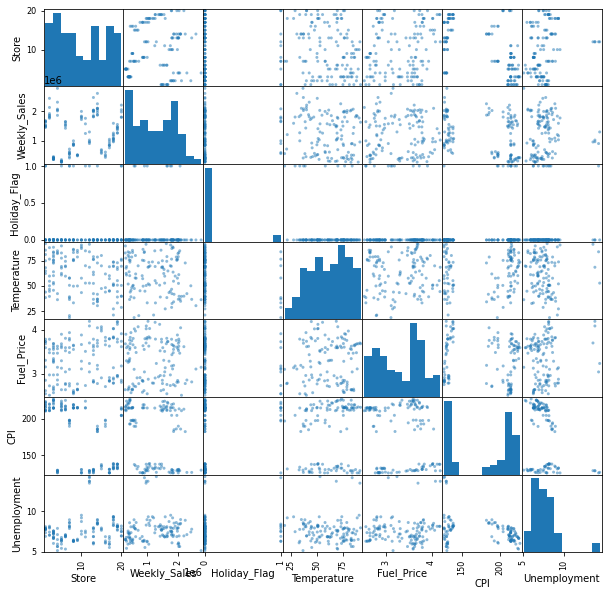

In [7]:
pd.plotting.scatter_matrix(sales_df, figsize = (10,10))
plt.show

# Imputing values   
Here we do the imputing **before** the train-test split only because the dataset is very small.

In [64]:
sales_df.Date = pd.to_datetime(sales_df.Date, infer_datetime_format=True)


## weekly sales   
delete rows with missing target values

In [181]:
sales_cleaned = sales_df.loc[sales_df.Weekly_Sales.notnull(),:].copy()
display(100*sales_cleaned.isnull().sum()/sales_cleaned.shape[0])

Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
dtype: float64

In [182]:
sales_cleaned['Day'] = sales_cleaned.Date.dt.day
sales_cleaned['Month'] = sales_cleaned.Date.dt.month
sales_cleaned['Year'] = sales_cleaned.Date.dt.year
sales_cleaned['DayOfWeek'] = sales_cleaned.Date.dt.day_of_week

### impute holiday flag

In [183]:
sales_cleaned.loc[sales_df.Holiday_Flag.isnull(),'Holiday_Flag']=0
display(100*sales_cleaned.isnull().sum()/sales_cleaned.shape[0])

Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
Day             13.235294
Month           13.235294
Year            13.235294
DayOfWeek       13.235294
dtype: float64

### impute temperature    
mean regarding month

In [184]:
def temp_impute(x):
    if pd.isnull(x['Date']):
        return sales_cleaned.Temperature.mean()
    else:
        return sales_cleaned.loc[sales_cleaned.Month == x['Month'],'Temperature'].mean()
    

In [185]:
sales_cleaned.loc[sales_cleaned.Temperature.isnull(),'Temperature'] = \
sales_cleaned.loc[sales_cleaned.Temperature.isnull(),:].apply(temp_impute, axis = 1)

In [186]:
display(100*sales_cleaned.isnull().sum()/sales_cleaned.shape[0])

Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature      0.000000
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
Day             13.235294
Month           13.235294
Year            13.235294
DayOfWeek       13.235294
dtype: float64

## Impute fuel price   
according to Year or store

In [187]:
def fuel_impute(x):
    if pd.isnull(x['Date']):
        res =  sales_cleaned.loc[sales_cleaned.Store == x['Store'],'Fuel_Price'].mean()
        if pd.isnull(res): #if there no fuel price value for this store
            return sales_cleaned.Fuel_Price.mean()
        else:
            return res
    else:
        return sales_cleaned.loc[sales_cleaned.Year == x['Year'],'Fuel_Price'].mean()
    

In [188]:
sales_cleaned.loc[sales_cleaned.Fuel_Price.isnull(),'Fuel_Price'] = \
sales_cleaned.loc[sales_cleaned.Fuel_Price.isnull(),:].apply(fuel_impute, axis = 1)

In [189]:
display(100*sales_cleaned.isnull().sum()/sales_cleaned.shape[0])

Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature      0.000000
Fuel_Price       0.000000
CPI              8.088235
Unemployment    10.294118
Day             13.235294
Month           13.235294
Year            13.235294
DayOfWeek       13.235294
dtype: float64

## Imput CPI and unemployment
<b> according to store

In [190]:
def impute_store(x, feature):
    return sales_cleaned.loc[sales_cleaned.Store == x['Store'],feature].mean()

In [191]:
sales_cleaned.loc[sales_cleaned.CPI.isnull(),'CPI'] = \
sales_cleaned.loc[sales_cleaned.CPI.isnull(),:].apply(lambda x: impute_store(x,'CPI'), axis = 1)

In [192]:
sales_cleaned.loc[sales_cleaned.Unemployment.isnull(),'Unemployment'] = \
sales_cleaned.loc[sales_cleaned.Unemployment.isnull(),:].apply(lambda x: impute_store(x,'Unemployment'), axis = 1)

In [193]:
display(100*sales_cleaned.isnull().sum()/sales_cleaned.shape[0])

Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature      0.000000
Fuel_Price       0.000000
CPI              0.000000
Unemployment     0.000000
Day             13.235294
Month           13.235294
Year            13.235294
DayOfWeek       13.235294
dtype: float64

## Impute date   
keep only day, month, year and dayofweek and impute using most frequent

In [194]:
sales_cleaned.drop(columns=['Date'], inplace = True)

In [195]:
imp = SimpleImputer(strategy='most_frequent')

In [196]:
sales_cleaned.Day = imp.fit_transform(sales_cleaned.Day.values.reshape(-1, 1))
sales_cleaned.DayOfWeek = imp.fit_transform(sales_cleaned.DayOfWeek.values.reshape(-1, 1))
sales_cleaned.Month = imp.fit_transform(sales_cleaned.Month.values.reshape(-1, 1))
sales_cleaned.Year = imp.fit_transform(sales_cleaned.Year.values.reshape(-1, 1))

In [197]:
display(100*sales_cleaned.isnull().sum()/sales_cleaned.shape[0])

Store           0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
Day             0.0
Month           0.0
Year            0.0
DayOfWeek       0.0
dtype: float64

In [198]:
sales_cleaned.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,DayOfWeek
0,6.0,1572117.54,0.0,59.610,3.0450,214.777523,6.858,18.0,2.0,2011.0,4.0
1,13.0,1807545.43,0.0,42.380,3.4350,128.616064,7.470,25.0,3.0,2011.0,4.0
3,11.0,1244390.03,0.0,84.570,3.1225,214.556497,7.346,12.0,5.0,2010.0,4.0
4,6.0,1644470.66,0.0,78.890,2.7590,212.412888,7.092,28.0,5.0,2010.0,4.0
5,4.0,1857533.70,0.0,62.568,2.7560,126.160226,7.896,28.0,5.0,2010.0,4.0


## get rid of outliers
mean +- 3* std

In [199]:
def select_non_outliers(Series):
    std = Series.std()
    mean = Series.mean()
    index = Series[Series.between(mean - 3*std, mean + 3*std)].index
    return index
    

In [200]:
for feature in ['Weekly_Sales'] + sales_cleaned.columns[3:7].tolist():
    i = sales_cleaned.shape[0]
    sales_cleaned = sales_cleaned.loc[select_non_outliers(sales_cleaned[feature]),:]
    print(f'there were {i-sales_cleaned.shape[0]} outliers in {feature}')

there were 0 outliers in Weekly_Sales
there were 0 outliers in Temperature
there were 0 outliers in Fuel_Price
there were 0 outliers in CPI
there were 5 outliers in Unemployment


In [218]:
len(sales_cleaned.Store.unique())

19

# Train test split and standardization

In [325]:
y = sales_cleaned.Weekly_Sales.values
X = sales_cleaned.drop(columns = ['Weekly_Sales']).copy()

In [281]:
ct = ColumnTransformer(
    [("oneHot", OneHotEncoder(drop = 'first'), [0,1]),\
     ("std_num", StandardScaler(), list(range(2,10)))])
X = ct.fit_transform(X)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Baseline

In [283]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [284]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.9749002704194172
R2 score on test set :  0.9442327766951245


## Ridge Regression

In [301]:
regressor = Ridge()

params = {
    'alpha': np.arange(0.01,0.1,0.001) 
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'alpha': 0.040999999999999974}
Best R2 score :  0.9169420304143707


In [302]:
y_train_pred = gridsearch.predict(X_train)
y_test_pred = gridsearch.predict(X_test)
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.9744418319747589
R2 score on test set :  0.9473680602054387


In [252]:
# Ridge regularization improves marginally
# However we noticed that the results are very unstable, certainly due to the very SMALL dataset

## With Lasso

In [304]:
regressor = Lasso()

params = {
    'alpha': np.arange(600,700,1) 
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'alpha': 619}
Best R2 score :  0.9186743292061738


In [305]:
y_train_pred = gridsearch.predict(X_train)
y_test_pred = gridsearch.predict(X_test)
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.9742694609279468
R2 score on test set :  0.9490388941730089


In [ ]:
#Lasso also seem to improve very slightly the predictions on the test dataset

In [332]:
regressor = Lasso(alpha=652)
regressor.fit(X_train, y_train)
regressor.coef_[18:]
{X.columns[i-17] : round(abs(regressor.coef_[i])/1000,2)  for i in range(19,27)}

{'Temperature': 46.6,
 'Fuel_Price': 16.25,
 'CPI': 32.16,
 'Unemployment': 79.8,
 'Day': 28.65,
 'Month': 62.67,
 'Year': 26.75,
 'DayOfWeek': 0.0}

In [336]:
print(f'coef value for the one_hot_encoded holiday: {regressor.coef_[19]/1000}')
print('Coef values for the one_hot_encoded store:')
regressor.coef_[:18]/1000 #Coef values for the one_hot_encoded store

coef value for the one_hot_encoded holiday: -46.60108767780165
Coef values for the one_hot_encoded store:


array([  413.22741372, -1211.54793863,   563.08612944, -1328.61042642,
          17.41132669,  -940.74560237,  -741.46224411, -1178.51111774,
         522.26629699,     0.        ,   442.19427619,   640.66539713,
        -776.00807314, -1099.50936589,  -719.42186228,  -255.65998779,
          -0.        ,   410.80596508])

We can see that the coefs for the **stores** are 10 sometimes 100 times larger than the other coefs.